# 과거 작품ID를 이용해 작품 기본 정보 가져오기

# Get Previous Works' Basic Information Utilizing Toon ID
*DATE:* 2022-08-06

*SUMMARY:* Get previous works' unformation with ID from '3.get_previousID.ipynb'

*FEATURE:* Use Selenium Webdriver for scraping information. 

**WARNING**\
It is based on the HTML/CSS format from August, 2022. So it may not function correctly now. For correction, check Naver Webtoon homepage's updated HTML/CSS format.

In [1]:
from selenium import webdriver 
from selenium.webdriver.common.by import By
import pandas as pd
import time
from tqdm import tqdm
import re

# 1. Preprocessing ID
ID dataframe includes IDs that have no previous works. You should remove that IDs before scraping.

In [2]:
# Load ID
df = pd.read_csv('최종_네이버웹툰_과거작품정보(1).csv', index_col='0')
df

,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
758037,723046.0,670139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758037,703308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648419,754875.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
773524,713289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Visualize the number of past work
import matplotlib.pyplot as plt

xlist = [0]
ylist = [890]

for i in range(len(df.columns)):
    x = i+1 
    y = (df.iloc[:,i].dropna(axis=0).count()) # 
    xlist.append(x)
    ylist.append(y)

Text(0.5, 0, 'Number of Past Work')

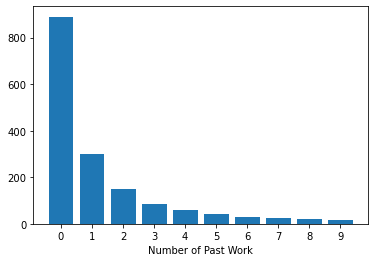

In [4]:
plt.bar(xlist, ylist)
plt.xticks(xlist)
plt.xlabel('Number of Past Work')

In [5]:
# Remove ID that has no previous work
df = df.dropna(axis=0, how='all')
df

,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
758037,723046.0,670139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758037,703308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648419,754875.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
783053,783052.0,736277.0,795262.0,783051.0,783055.0,NaN,NaN,NaN,NaN
602910,766658.0,682633.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
769747,780266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795041,747961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773524,713289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 758037 to 786979
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       302 non-null    float64
 1   2       149 non-null    float64
 2   3       85 non-null     float64
 3   4       58 non-null     float64
 4   5       40 non-null     float64
 5   6       30 non-null     float64
 6   7       27 non-null     float64
 7   8       19 non-null     float64
 8   9       16 non-null     float64
dtypes: float64(9)
memory usage: 23.6 KB


# 2. Get Previous Works' Basic Information
Code is similar to 1.get_basic_info.ipynb

In [12]:
driver = webdriver.Chrome('C:/Users/gynchoi/Trap/chromedriver.exe') 
URL = 'https://comic.naver.com/webtoon/weekday.nhn'
driver.get(URL)

C:\Users\gynchoi\AppData\Local\Temp\ipykernel_11548\3218804134.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/gynchoi/Trap/chromedriver.exe')


In [8]:
pastidlist = [] # Past ID
imglist = [] # Thumbnail image
titlelist = [] # Title
authorlist = [] # Author
contentlist = [] # Content (Plot)
genrelist = [] # Genre
agelist = [] # Recommended viewer age
likelist = [] # Num Likes
formlist = [] # Toon Format (Scroll or Cut)

for i in tqdm(range(len(df.index))):
    idlist = df.iloc[i,:].dropna().astype(int)
    
    for j in idlist:
        URL = 'https://comic.naver.com/webtoon/list?titleId=' + str(j)
        driver.get(URL)
        time.sleep(0.5)
    
        print(str(i)+'-'+str(j)+'번째 시도입니다')

        if (j in pastidlist): 
             pass
        
        else: 
            pastidlist.append(j)

            imgsrc = driver.find_element(By.CLASS_NAME,'thumb > a > img').get_attribute('src')
            imglist.append(imgsrc)

            title = driver.find_element(By.CLASS_NAME,'title').text
            titlelist.append(title)

            author = driver.find_element(By.CLASS_NAME,'wrt_nm').text
            authorlist.append(author)

            content = driver.find_element(By.CLASS_NAME,'detail > p').text
            contentlist.append(content)

            genre = driver.find_element(By.CLASS_NAME,'genre').text
            genrelist.append(genre)
            
            like = driver.find_element(By.CLASS_NAME,'u_cnt').text
            likelist.append(like)
            

            try:
                age = driver.find_element(By.CLASS_NAME,'age').text
            except:
                age = '전체연령가'
            print(age)
            agelist.append(age)
            
            try:
                cuttoon = driver.find_element(By.CLASS_NAME, 'ico_cut').text
                form = '컷툰'
            except:
                form = '스크롤'
            formlist.append(form) 


  0%|                                                                                          | 0/302 [00:00<?, ?it/s]

0-723046번째 시도입니다
15세 이용가
0-670139번째 시도입니다



  0%|▎                                                                                 | 1/302 [00:02<13:07,  2.62s/it]

15세 이용가
1-703308번째 시도입니다



  1%|▌                                                                                 | 2/302 [00:04<09:33,  1.91s/it]

12세 이용가
2-754875번째 시도입니다



  1%|▊                                                                                 | 3/302 [00:05<07:51,  1.58s/it]

12세 이용가
3-783052번째 시도입니다
15세 이용가
3-736277번째 시도입니다
15세 이용가
3-795262번째 시도입니다
15세 이용가
3-783051번째 시도입니다
15세 이용가
3-783055번째 시도입니다



  1%|█                                                                                 | 4/302 [00:10<16:03,  3.23s/it]

18세 이용가
4-766658번째 시도입니다
전체연령가
4-682633번째 시도입니다



  2%|█▎                                                                                | 5/302 [00:13<14:17,  2.89s/it]

전체연령가
5-783592번째 시도입니다
전체연령가
5-764796번째 시도입니다
12세 이용가
5-626906번째 시도입니다
전체연령가
5-716782번째 시도입니다
전체연령가
5-578125번째 시도입니다
전체연령가
5-663851번째 시도입니다
전체연령가
5-632319번째 시도입니다
전체연령가
5-492659번째 시도입니다
전체연령가
5-318992번째 시도입니다



  2%|█▋                                                                                | 6/302 [00:23<26:42,  5.41s/it]

전체연령가
6-728750번째 시도입니다



  2%|█▉                                                                                | 7/302 [00:24<19:38,  3.99s/it]

12세 이용가
7-714880번째 시도입니다
전체연령가



  3%|██▏                                                                               | 8/302 [00:26<16:07,  3.29s/it]

7-578125번째 시도입니다
8-796867번째 시도입니다



  3%|██▍                                                                               | 9/302 [00:27<12:33,  2.57s/it]

18세 이용가
9-796867번째 시도입니다
9-730980번째 시도입니다
전체연령가
9-684435번째 시도입니다
전체연령가
9-652122번째 시도입니다



  3%|██▋                                                                              | 10/302 [00:31<14:44,  3.03s/it]

전체연령가
10-727838번째 시도입니다
12세 이용가
10-660366번째 시도입니다



  4%|██▉                                                                              | 11/302 [00:33<13:43,  2.83s/it]

18세 이용가
11-727838번째 시도입니다



  4%|███▏                                                                             | 12/302 [00:35<12:07,  2.51s/it]

11-660366번째 시도입니다
12-747271번째 시도입니다



  4%|███▍                                                                             | 13/302 [00:36<10:04,  2.09s/it]

15세 이용가
13-752414번째 시도입니다



  5%|███▊                                                                             | 14/302 [00:37<08:41,  1.81s/it]

15세 이용가
14-24777번째 시도입니다



  5%|████                                                                             | 15/302 [00:39<07:52,  1.64s/it]

전체연령가
15-726212번째 시도입니다



  5%|████▎                                                                            | 16/302 [00:40<07:18,  1.53s/it]

전체연령가
16-772725번째 시도입니다
12세 이용가
16-700843번째 시도입니다



  6%|████▌                                                                            | 17/302 [00:42<08:22,  1.76s/it]

전체연령가
17-789038번째 시도입니다



  6%|████▊                                                                            | 18/302 [00:43<07:26,  1.57s/it]

전체연령가
18-784841번째 시도입니다



  6%|█████                                                                            | 19/302 [00:44<06:37,  1.41s/it]

전체연령가
19-784841번째 시도입니다
19-724274번째 시도입니다
15세 이용가
19-694806번째 시도입니다
전체연령가
19-671270번째 시도입니다
전체연령가
19-652403번째 시도입니다
전체연령가
19-557673번째 시도입니다



  7%|█████▎                                                                           | 20/302 [00:51<13:21,  2.84s/it]

전체연령가
20-736281번째 시도입니다



  7%|█████▋                                                                           | 21/302 [00:52<10:53,  2.32s/it]

전체연령가
21-758671번째 시도입니다



  7%|█████▉                                                                           | 22/302 [00:53<09:02,  1.94s/it]

전체연령가
22-716163번째 시도입니다



  8%|██████▏                                                                          | 23/302 [00:54<07:43,  1.66s/it]

전체연령가
23-460688번째 시도입니다



  8%|██████▍                                                                          | 24/302 [00:55<06:51,  1.48s/it]

12세 이용가
24-700139번째 시도입니다



  8%|██████▋                                                                          | 25/302 [00:56<06:12,  1.35s/it]

전체연령가
25-792769번째 시도입니다



  9%|██████▉                                                                          | 26/302 [00:57<05:49,  1.27s/it]

전체연령가
26-723790번째 시도입니다



  9%|███████▏                                                                         | 27/302 [00:58<05:31,  1.20s/it]

15세 이용가
27-752402번째 시도입니다



  9%|███████▌                                                                         | 28/302 [00:59<05:14,  1.15s/it]

15세 이용가
28-752402번째 시도입니다
28-759894번째 시도입니다



 10%|███████▊                                                                         | 29/302 [01:01<06:11,  1.36s/it]

15세 이용가
29-723362번째 시도입니다



 10%|████████                                                                         | 30/302 [01:02<06:06,  1.35s/it]

15세 이용가
30-687137번째 시도입니다
전체연령가
30-537991번째 시도입니다
12세 이용가
30-258207번째 시도입니다



 10%|████████▎                                                                        | 31/302 [01:06<09:20,  2.07s/it]

전체연령가
31-786910번째 시도입니다



 11%|████████▌                                                                        | 32/302 [01:07<07:59,  1.78s/it]

전체연령가
32-783769번째 시도입니다
15세 이용가
32-785700번째 시도입니다
15세 이용가
32-778748번째 시도입니다
15세 이용가
32-778747번째 시도입니다
15세 이용가
32-763308번째 시도입니다
15세 이용가
32-732256번째 시도입니다
전체연령가
32-730811번째 시도입니다
전체연령가
32-722382번째 시도입니다
전체연령가
32-720716번째 시도입니다



 11%|████████▊                                                                        | 33/302 [01:18<20:43,  4.62s/it]

전체연령가
33-753856번째 시도입니다



 11%|█████████                                                                        | 34/302 [01:20<16:05,  3.60s/it]

15세 이용가
34-786935번째 시도입니다
15세 이용가
34-748421번째 시도입니다



 12%|█████████▍                                                                       | 35/302 [01:22<14:16,  3.21s/it]

전체연령가
35-740423번째 시도입니다
전체연령가
35-675554번째 시도입니다
전체연령가
35-694803번째 시도입니다
전체연령가
35-687128번째 시도입니다
전체연령가
35-683304번째 시도입니다
전체연령가
35-668948번째 시도입니다
전체연령가
35-335885번째 시도입니다
12세 이용가
35-663681번째 시도입니다
전체연령가
35-654819번째 시도입니다



 12%|█████████▋                                                                       | 36/302 [01:32<23:53,  5.39s/it]

전체연령가
36-703635번째 시도입니다



 12%|█████████▉                                                                       | 37/302 [01:34<18:26,  4.17s/it]

12세 이용가
37-775337번째 시도입니다



 13%|██████████▏                                                                      | 38/302 [01:35<14:33,  3.31s/it]

전체연령가
38-761498번째 시도입니다
15세 이용가
38-794156번째 시도입니다



 13%|██████████▍                                                                      | 39/302 [01:37<13:06,  2.99s/it]

15세 이용가
39-721949번째 시도입니다



 13%|██████████▋                                                                      | 40/302 [01:38<10:29,  2.40s/it]

12세 이용가
40-746750번째 시도입니다



 14%|██████████▉                                                                      | 41/302 [01:39<08:44,  2.01s/it]

전체연령가
41-786973번째 시도입니다
12세 이용가
41-786978번째 시도입니다



 14%|███████████▎                                                                     | 42/302 [01:41<08:57,  2.07s/it]

12세 이용가
42-783052번째 시도입니다
42-736277번째 시도입니다
42-795262번째 시도입니다
42-783051번째 시도입니다



 14%|███████████▌                                                                     | 43/302 [01:46<11:50,  2.74s/it]

42-783055번째 시도입니다
43-780995번째 시도입니다
전체연령가
43-780008번째 시도입니다
전체연령가
43-728015번째 시도입니다
전체연령가



 15%|███████████▊                                                                     | 44/302 [01:50<14:07,  3.28s/it]

43-766658번째 시도입니다
44-733488번째 시도입니다
전체연령가
44-642700번째 시도입니다
전체연령가
44-668050번째 시도입니다



 15%|████████████                                                                     | 45/302 [01:54<14:05,  3.29s/it]

전체연령가
45-597466번째 시도입니다
12세 이용가
45-317365번째 시도입니다



 15%|████████████▎                                                                    | 46/302 [01:56<12:29,  2.93s/it]

전체연령가



 16%|████████████▌                                                                    | 47/302 [01:57<09:42,  2.28s/it]

46-597466번째 시도입니다
47-789979번째 시도입니다



 16%|████████████▊                                                                    | 48/302 [01:58<08:04,  1.91s/it]

15세 이용가
48-738174번째 시도입니다



 16%|█████████████▏                                                                   | 49/302 [01:59<07:00,  1.66s/it]

15세 이용가
49-739097번째 시도입니다
전체연령가
49-714886번째 시도입니다



 17%|█████████████▍                                                                   | 50/302 [02:01<07:35,  1.81s/it]

12세 이용가
50-642598번째 시도입니다
전체연령가
50-599232번째 시도입니다
전체연령가
50-524353번째 시도입니다
전체연령가
50-70046번째 시도입니다



 17%|█████████████▋                                                                   | 51/302 [02:05<10:41,  2.55s/it]

전체연령가
51-752803번째 시도입니다
15세 이용가
51-708378번째 시도입니다
15세 이용가
51-732403번째 시도입니다



 17%|█████████████▉                                                                   | 52/302 [02:08<11:32,  2.77s/it]

15세 이용가
52-557675번째 시도입니다
전체연령가
52-25735번째 시도입니다



 18%|██████████████▏                                                                  | 53/302 [02:10<10:40,  2.57s/it]

전체연령가
53-702608번째 시도입니다



 18%|██████████████▍                                                                  | 54/302 [02:12<08:46,  2.12s/it]

15세 이용가
54-783877번째 시도입니다



 18%|██████████████▊                                                                  | 55/302 [02:13<07:23,  1.79s/it]

15세 이용가
55-710762번째 시도입니다
12세 이용가
55-578125번째 시도입니다
55-685294번째 시도입니다
전체연령가
55-661886번째 시도입니다
전체연령가
55-632319번째 시도입니다
55-541901번째 시도입니다



 19%|███████████████                                                                  | 56/302 [02:18<12:20,  3.01s/it]

전체연령가
56-409630번째 시도입니다
전체연령가
56-627662번째 시도입니다
전체연령가
56-620640번째 시도입니다



 19%|███████████████▎                                                                 | 57/302 [02:22<12:47,  3.13s/it]

전체연령가
57-783552번째 시도입니다
12세 이용가
57-798101번째 시도입니다
12세 이용가
57-714293번째 시도입니다



 19%|███████████████▌                                                                 | 58/302 [02:25<12:39,  3.11s/it]

15세 이용가
58-737032번째 시도입니다



 20%|███████████████▊                                                                 | 59/302 [02:26<10:13,  2.52s/it]

전체연령가
59-670131번째 시도입니다
15세 이용가
59-658823번째 시도입니다



 20%|████████████████                                                                 | 60/302 [02:28<09:44,  2.42s/it]

18세 이용가
60-797259번째 시도입니다



 20%|████████████████▎                                                                | 61/302 [02:29<08:05,  2.02s/it]

15세 이용가
61-741449번째 시도입니다



 21%|████████████████▋                                                                | 62/302 [02:31<07:06,  1.78s/it]

전체연령가
62-579414번째 시도입니다
전체연령가
62-24995번째 시도입니다



 21%|████████████████▉                                                                | 63/302 [02:33<07:54,  1.99s/it]

전체연령가
63-669358번째 시도입니다



 21%|█████████████████▏                                                               | 64/302 [02:34<06:55,  1.75s/it]

12세 이용가
64-783549번째 시도입니다



 22%|█████████████████▍                                                               | 65/302 [02:36<06:27,  1.63s/it]

12세 이용가
65-718019번째 시도입니다



 22%|█████████████████▋                                                               | 66/302 [02:37<05:54,  1.50s/it]

12세 이용가
66-783769번째 시도입니다
66-785700번째 시도입니다
66-778748번째 시도입니다
66-778747번째 시도입니다
66-763308번째 시도입니다
66-732256번째 시도입니다
66-730811번째 시도입니다
66-722382번째 시도입니다



 22%|█████████████████▉                                                               | 67/302 [02:45<13:16,  3.39s/it]

66-720716번째 시도입니다
67-786883번째 시도입니다
12세 이용가
67-748409번째 시도입니다



 23%|██████████████████▏                                                              | 68/302 [02:47<11:50,  3.04s/it]

전체연령가
68-765821번째 시도입니다
15세 이용가
68-770873번째 시도입니다
15세 이용가
68-642653번째 시도입니다
15세 이용가
68-729039번째 시도입니다
전체연령가
68-694131번째 시도입니다
15세 이용가
68-616238번째 시도입니다
15세 이용가
68-546750번째 시도입니다
전체연령가
68-520600번째 시도입니다
18세 이용가
68-52946번째 시도입니다



 23%|██████████████████▌                                                              | 69/302 [02:56<19:28,  5.01s/it]

전체연령가
69-710741번째 시도입니다
전체연령가



 23%|██████████████████▊                                                              | 70/302 [02:58<15:54,  4.11s/it]

69-650292번째 시도입니다
전체연령가



 24%|███████████████████                                                              | 71/302 [02:59<11:58,  3.11s/it]

70-786910번째 시도입니다



 24%|███████████████████▎                                                             | 72/302 [03:00<09:23,  2.45s/it]

71-729040번째 시도입니다
전체연령가



 24%|███████████████████▌                                                             | 73/302 [03:01<07:37,  2.00s/it]

72-769660번째 시도입니다
15세 이용가
73-724274번째 시도입니다
73-617882번째 시도입니다
전체연령가
73-521504번째 시도입니다
전체연령가
73-507275번째 시도입니다



 25%|███████████████████▊                                                             | 74/302 [03:05<10:01,  2.64s/it]

전체연령가
74-481793번째 시도입니다



 25%|████████████████████                                                             | 75/302 [03:06<08:18,  2.19s/it]

전체연령가
75-662160번째 시도입니다
12세 이용가
75-557678번째 시도입니다
12세 이용가
75-471284번째 시도입니다
12세 이용가
75-15568번째 시도입니다
15세 이용가
75-186814번째 시도입니다
12세 이용가
75-26473번째 시도입니다
15세 이용가



 25%|████████████████████▍                                                            | 76/302 [03:14<14:39,  3.89s/it]

75-24777번째 시도입니다
76-721919번째 시도입니다
전체연령가
76-741928번째 시도입니다



 25%|████████████████████▋                                                            | 77/302 [03:16<12:39,  3.38s/it]

전체연령가
77-710639번째 시도입니다



 26%|████████████████████▉                                                            | 78/302 [03:17<10:01,  2.69s/it]

12세 이용가
78-783769번째 시도입니다
78-785700번째 시도입니다
78-778748번째 시도입니다
78-778747번째 시도입니다
78-763308번째 시도입니다
78-732256번째 시도입니다
78-730811번째 시도입니다
78-722382번째 시도입니다



 26%|█████████████████████▏                                                           | 79/302 [03:25<15:29,  4.17s/it]

78-720716번째 시도입니다
79-783769번째 시도입니다
79-785700번째 시도입니다
79-778748번째 시도입니다
79-778747번째 시도입니다
79-763308번째 시도입니다
79-732256번째 시도입니다
79-730811번째 시도입니다
79-722382번째 시도입니다



 26%|█████████████████████▍                                                           | 80/302 [03:33<19:05,  5.16s/it]

79-720716번째 시도입니다



 27%|█████████████████████▋                                                           | 81/302 [03:33<14:16,  3.88s/it]

80-783769번째 시도입니다



 27%|█████████████████████▉                                                           | 82/302 [03:34<10:50,  2.96s/it]

81-789979번째 시도입니다
82-793005번째 시도입니다
전체연령가
82-778153번째 시도입니다
전체연령가
82-651673번째 시도입니다
12세 이용가
82-713334번째 시도입니다
전체연령가
82-701699번째 시도입니다
전체연령가
82-694190번째 시도입니다
전체연령가
82-686019번째 시도입니다
전체연령가
82-606911번째 시도입니다
전체연령가
82-387518번째 시도입니다



 27%|██████████████████████▎                                                          | 83/302 [03:44<18:21,  5.03s/it]

전체연령가
83-389848번째 시도입니다



 28%|██████████████████████▌                                                          | 84/302 [03:45<13:54,  3.83s/it]

15세 이용가
84-743838번째 시도입니다



 28%|██████████████████████▊                                                          | 85/302 [03:46<10:48,  2.99s/it]

15세 이용가
85-761104번째 시도입니다
12세 이용가
85-751642번째 시도입니다



 28%|███████████████████████                                                          | 86/302 [03:48<09:47,  2.72s/it]

12세 이용가
86-761498번째 시도입니다



 29%|███████████████████████▎                                                         | 87/302 [03:50<08:30,  2.37s/it]

86-794156번째 시도입니다
87-25455번째 시도입니다
12세 이용가
87-511447번째 시도입니다
12세 이용가
87-552730번째 시도입니다



 29%|███████████████████████▌                                                         | 88/302 [03:53<09:32,  2.67s/it]

전체연령가
88-747370번째 시도입니다
전체연령가
88-358422번째 시도입니다
12세 이용가
88-552730번째 시도입니다
88-206146번째 시도입니다
전체연령가
88-112933번째 시도입니다
전체연령가
88-25898번째 시도입니다
전체연령가
88-24777번째 시도입니다
88-23183번째 시도입니다



 29%|███████████████████████▊                                                         | 89/302 [04:01<14:48,  4.17s/it]

전체연령가
89-718018번째 시도입니다
15세 이용가
89-677740번째 시도입니다



 30%|████████████████████████▏                                                        | 90/302 [04:03<12:29,  3.53s/it]

15세 이용가
90-761498번째 시도입니다



 30%|████████████████████████▍                                                        | 91/302 [04:04<10:22,  2.95s/it]

90-794156번째 시도입니다
91-698469번째 시도입니다



 30%|████████████████████████▋                                                        | 92/302 [04:06<08:27,  2.42s/it]

전체연령가
92-776601번째 시도입니다



 31%|████████████████████████▉                                                        | 93/302 [04:07<07:04,  2.03s/it]

15세 이용가



 31%|█████████████████████████▏                                                       | 94/302 [04:08<05:47,  1.67s/it]

93-776601번째 시도입니다
94-745235번째 시도입니다



 31%|█████████████████████████▍                                                       | 95/302 [04:09<05:22,  1.56s/it]

18세 이용가
95-710747번째 시도입니다
15세 이용가
95-761565번째 시도입니다
15세 이용가
95-670149번째 시도입니다



 32%|█████████████████████████▋                                                       | 96/302 [04:12<07:07,  2.08s/it]

15세 이용가
96-759089번째 시도입니다
전체연령가
96-756056번째 시도입니다



 32%|██████████████████████████                                                       | 97/302 [04:14<07:15,  2.12s/it]

전체연령가
97-604147번째 시도입니다
전체연령가
97-407142번째 시도입니다
12세 이용가
97-73352번째 시도입니다



 32%|██████████████████████████▎                                                      | 98/302 [04:18<08:14,  2.43s/it]

12세 이용가
98-714185번째 시도입니다



 33%|██████████████████████████▌                                                      | 99/302 [04:19<06:50,  2.02s/it]

12세 이용가
99-679570번째 시도입니다



 33%|██████████████████████████▍                                                     | 100/302 [04:20<05:48,  1.72s/it]

12세 이용가
100-682222번째 시도입니다
15세 이용가
100-483796번째 시도입니다
15세 이용가
100-67235번째 시도입니다



 33%|██████████████████████████▊                                                     | 101/302 [04:23<07:25,  2.21s/it]

18세 이용가
101-789528번째 시도입니다



 34%|███████████████████████████                                                     | 102/302 [04:24<06:16,  1.88s/it]

전체연령가
102-783861번째 시도입니다
12세 이용가
102-729037번째 시도입니다



 34%|███████████████████████████▎                                                    | 103/302 [04:26<06:27,  1.95s/it]

15세 이용가
103-736928번째 시도입니다



 34%|███████████████████████████▌                                                    | 104/302 [04:27<05:34,  1.69s/it]

12세 이용가
104-733728번째 시도입니다



 35%|███████████████████████████▊                                                    | 105/302 [04:28<04:53,  1.49s/it]

15세 이용가



 35%|████████████████████████████                                                    | 106/302 [04:29<04:05,  1.25s/it]

105-733728번째 시도입니다
106-760001번째 시도입니다



 35%|████████████████████████████▎                                                   | 107/302 [04:30<03:57,  1.22s/it]

12세 이용가
107-760001번째 시도입니다
107-721461번째 시도입니다



 36%|████████████████████████████▌                                                   | 108/302 [04:32<04:34,  1.41s/it]

전체연령가
108-604146번째 시도입니다
15세 이용가
108-360613번째 시도입니다



 36%|████████████████████████████▊                                                   | 109/302 [04:34<05:10,  1.61s/it]

18세 이용가
109-724965번째 시도입니다



 36%|█████████████████████████████▏                                                  | 110/302 [04:35<04:36,  1.44s/it]

전체연령가



 37%|█████████████████████████████▍                                                  | 111/302 [04:36<03:54,  1.23s/it]

110-721949번째 시도입니다
111-734041번째 시도입니다



 37%|█████████████████████████████▋                                                  | 112/302 [04:37<03:45,  1.19s/it]

12세 이용가
112-702423번째 시도입니다



 37%|█████████████████████████████▉                                                  | 113/302 [04:38<03:36,  1.15s/it]

15세 이용가
113-783534번째 시도입니다



 38%|██████████████████████████████▏                                                 | 114/302 [04:39<03:29,  1.11s/it]

전체연령가
114-793696번째 시도입니다
15세 이용가
114-774300번째 시도입니다
15세 이용가
114-785469번째 시도입니다
전체연령가
114-755601번째 시도입니다
15세 이용가
114-729326번째 시도입니다
12세 이용가
114-757657번째 시도입니다
전체연령가
114-702422번째 시도입니다
12세 이용가
114-712548번째 시도입니다
전체연령가
114-675393번째 시도입니다



 38%|██████████████████████████████▍                                                 | 115/302 [04:49<11:49,  3.79s/it]

18세 이용가
115-753307번째 시도입니다
전체연령가
115-761250번째 시도입니다
전체연령가
115-678497번째 시도입니다
전체연령가
115-638994번째 시도입니다
전체연령가
115-604147번째 시도입니다
115-337962번째 시도입니다
12세 이용가
115-58219번째 시도입니다



 38%|██████████████████████████████▋                                                 | 116/302 [04:56<14:37,  4.72s/it]

12세 이용가
116-733077번째 시도입니다
12세 이용가
116-696602번째 시도입니다



 39%|██████████████████████████████▉                                                 | 117/302 [04:58<12:13,  3.96s/it]

전체연령가
117-746747번째 시도입니다



 39%|███████████████████████████████▎                                                | 118/302 [04:59<09:26,  3.08s/it]

전체연령가
118-718016번째 시도입니다



 39%|███████████████████████████████▌                                                | 119/302 [05:00<07:29,  2.46s/it]

전체연령가
119-797116번째 시도입니다
전체연령가
119-790824번째 시도입니다
전체연령가
119-773419번째 시도입니다
전체연령가
119-755642번째 시도입니다
전체연령가
119-734348번째 시도입니다
전체연령가
119-679519번째 시도입니다
전체연령가
119-705414번째 시도입니다
전체연령가
119-690596번째 시도입니다



 40%|███████████████████████████████▊                                                | 120/302 [05:09<12:58,  4.28s/it]

전체연령가



 40%|████████████████████████████████                                                | 121/302 [05:10<09:48,  3.25s/it]

120-747271번째 시도입니다



 40%|████████████████████████████████▎                                               | 122/302 [05:11<07:40,  2.56s/it]

121-728750번째 시도입니다
122-778747번째 시도입니다
122-729946번째 시도입니다



 41%|████████████████████████████████▌                                               | 123/302 [05:13<07:08,  2.39s/it]

15세 이용가



 41%|████████████████████████████████▊                                               | 124/302 [05:13<05:43,  1.93s/it]

123-783549번째 시도입니다
124-746857번째 시도입니다
15세 이용가
124-792694번째 시도입니다
15세 이용가
124-721463번째 시도입니다



 41%|█████████████████████████████████                                               | 125/302 [05:17<07:02,  2.39s/it]

15세 이용가
125-797410번째 시도입니다
18세 이용가
125-764129번째 시도입니다
15세 이용가
125-710754번째 시도입니다



 42%|█████████████████████████████████▍                                              | 126/302 [05:20<07:44,  2.64s/it]

전체연령가
126-694805번째 시도입니다
12세 이용가
126-293520번째 시도입니다
12세 이용가
126-76758번째 시도입니다
전체연령가
126-66913번째 시도입니다
전체연령가
126-25695번째 시도입니다



 42%|█████████████████████████████████▋                                              | 127/302 [05:25<09:57,  3.41s/it]

전체연령가
127-722728번째 시도입니다



 42%|█████████████████████████████████▉                                              | 128/302 [05:26<07:48,  2.69s/it]

전체연령가
128-775218번째 시도입니다
15세 이용가
128-733047번째 시도입니다
15세 이용가
128-752072번째 시도입니다
15세 이용가
128-20853번째 시도입니다
전체연령가
128-713334번째 시도입니다
128-697656번째 시도입니다
12세 이용가
128-718023번째 시도입니다
전체연령가
128-679544번째 시도입니다
12세 이용가



 43%|██████████████████████████████████▏                                             | 129/302 [05:35<13:10,  4.57s/it]

128-690596번째 시도입니다
129-720117번째 시도입니다
15세 이용가
129-707671번째 시도입니다
18세 이용가
129-661043번째 시도입니다
18세 이용가
129-613076번째 시도입니다
12세 이용가
129-604147번째 시도입니다
129-268859번째 시도입니다
12세 이용가
129-26115번째 시도입니다



 43%|██████████████████████████████████▍                                             | 130/302 [05:43<15:27,  5.39s/it]

18세 이용가
130-251575번째 시도입니다



 43%|██████████████████████████████████▋                                             | 131/302 [05:44<11:37,  4.08s/it]

전체연령가



 44%|██████████████████████████████████▉                                             | 132/302 [05:44<08:42,  3.07s/it]

131-752414번째 시도입니다
132-761596번째 시도입니다



 44%|███████████████████████████████████▏                                            | 133/302 [05:45<06:58,  2.47s/it]

전체연령가
133-798331번째 시도입니다



 44%|███████████████████████████████████▍                                            | 134/302 [05:47<05:47,  2.07s/it]

12세 이용가
134-727798번째 시도입니다



 45%|███████████████████████████████████▊                                            | 135/302 [05:48<04:59,  1.79s/it]

15세 이용가
135-725552번째 시도입니다



 45%|████████████████████████████████████                                            | 136/302 [05:49<04:31,  1.63s/it]

전체연령가



 45%|████████████████████████████████████▎                                           | 137/302 [05:50<03:49,  1.39s/it]

136-797259번째 시도입니다



 46%|████████████████████████████████████▌                                           | 138/302 [05:51<03:23,  1.24s/it]

137-783534번째 시도입니다
138-713055번째 시도입니다



 46%|████████████████████████████████████▊                                           | 139/302 [05:52<03:31,  1.30s/it]

12세 이용가
139-783117번째 시도입니다
15세 이용가
139-759940번째 시도입니다



 46%|█████████████████████████████████████                                           | 140/302 [05:54<04:23,  1.63s/it]

15세 이용가
140-774035번째 시도입니다
전체연령가
140-773650번째 시도입니다



 47%|█████████████████████████████████████▎                                          | 141/302 [05:57<04:44,  1.77s/it]

전체연령가
141-568986번째 시도입니다
전체연령가
141-720120번째 시도입니다



 47%|█████████████████████████████████████▌                                          | 142/302 [05:59<05:01,  1.88s/it]

전체연령가
142-710751번째 시도입니다



 47%|█████████████████████████████████████▉                                          | 143/302 [06:00<04:21,  1.64s/it]

15세 이용가
143-727826번째 시도입니다



 48%|██████████████████████████████████████▏                                         | 144/302 [06:01<03:49,  1.45s/it]

12세 이용가
144-772725번째 시도입니다



 48%|██████████████████████████████████████▍                                         | 145/302 [06:02<03:54,  1.49s/it]

144-700843번째 시도입니다
145-797937번째 시도입니다
12세 이용가
145-785837번째 시도입니다



 48%|██████████████████████████████████████▋                                         | 146/302 [06:05<04:35,  1.76s/it]

12세 이용가
146-495498번째 시도입니다
전체연령가
146-105533번째 시도입니다



 49%|██████████████████████████████████████▉                                         | 147/302 [06:07<04:45,  1.84s/it]

전체연령가
147-495498번째 시도입니다



 49%|███████████████████████████████████████▏                                        | 148/302 [06:08<04:25,  1.72s/it]

147-105533번째 시도입니다



 49%|███████████████████████████████████████▍                                        | 149/302 [06:09<03:40,  1.44s/it]

148-783769번째 시도입니다
149-779627번째 시도입니다
15세 이용가
149-730391번째 시도입니다
15세 이용가
149-750579번째 시도입니다
18세 이용가
149-750580번째 시도입니다



 50%|███████████████████████████████████████▋                                        | 150/302 [06:13<05:43,  2.26s/it]

15세 이용가
150-730204번째 시도입니다



 50%|████████████████████████████████████████                                        | 151/302 [06:14<04:48,  1.91s/it]

15세 이용가
151-783536번째 시도입니다
15세 이용가
151-776655번째 시도입니다
12세 이용가
151-756060번째 시도입니다
전체연령가



 50%|████████████████████████████████████████▎                                       | 152/302 [06:19<07:04,  2.83s/it]

151-723790번째 시도입니다
152-712694번째 시도입니다
15세 이용가
152-694191번째 시도입니다
15세 이용가
152-675830번째 시도입니다



 51%|████████████████████████████████████████▌                                       | 153/302 [06:22<07:13,  2.91s/it]

15세 이용가



 51%|████████████████████████████████████████▊                                       | 154/302 [06:23<05:35,  2.26s/it]

153-758671번째 시도입니다
154-783536번째 시도입니다
154-776655번째 시도입니다
154-756060번째 시도입니다



 51%|█████████████████████████████████████████                                       | 155/302 [06:26<06:19,  2.59s/it]

154-723790번째 시도입니다
155-710747번째 시도입니다
155-761565번째 시도입니다



 52%|█████████████████████████████████████████▎                                      | 156/302 [06:29<06:22,  2.62s/it]

155-670149번째 시도입니다
156-703850번째 시도입니다
전체연령가
156-733082번째 시도입니다



 52%|█████████████████████████████████████████▌                                      | 157/302 [06:31<06:00,  2.49s/it]

전체연령가
157-665170번째 시도입니다
12세 이용가
157-557674번째 시도입니다



 52%|█████████████████████████████████████████▊                                      | 158/302 [06:33<05:39,  2.36s/it]

12세 이용가
158-602923번째 시도입니다



 53%|██████████████████████████████████████████                                      | 159/302 [06:34<04:42,  1.98s/it]

전체연령가
159-737009번째 시도입니다



 53%|██████████████████████████████████████████▍                                     | 160/302 [06:36<04:07,  1.75s/it]

전체연령가



 53%|██████████████████████████████████████████▋                                     | 161/302 [06:36<03:24,  1.45s/it]

160-783877번째 시도입니다
161-22897번째 시도입니다
12세 이용가
161-26456번째 시도입니다
15세 이용가



 54%|██████████████████████████████████████████▉                                     | 162/302 [06:39<04:25,  1.90s/it]

161-24777번째 시도입니다
162-655746번째 시도입니다
12세 이용가
162-658076번째 시도입니다
15세 이용가
162-579417번째 시도입니다
12세 이용가
162-25913번째 시도입니다



 54%|███████████████████████████████████████████▏                                    | 163/302 [06:45<06:51,  2.96s/it]

12세 이용가



 54%|███████████████████████████████████████████▍                                    | 164/302 [06:46<05:16,  2.29s/it]

163-658076번째 시도입니다
164-160461번째 시도입니다



 55%|███████████████████████████████████████████▋                                    | 165/302 [06:47<04:38,  2.03s/it]

12세 이용가
165-703628번째 시도입니다
전체연령가
165-689705번째 시도입니다
12세 이용가
165-668102번째 시도입니다



 55%|███████████████████████████████████████████▉                                    | 166/302 [06:50<05:35,  2.47s/it]

12세 이용가
166-736277번째 시도입니다
166-783054번째 시도입니다
15세 이용가
166-762071번째 시도입니다
15세 이용가
166-733766번째 시도입니다
15세 이용가
166-718707번째 시도입니다
12세 이용가
166-702674번째 시도입니다
전체연령가
166-659273번째 시도입니다



 55%|████████████████████████████████████████████▏                                   | 167/302 [06:58<09:07,  4.05s/it]

12세 이용가
167-720127번째 시도입니다



 56%|████████████████████████████████████████████▌                                   | 168/302 [06:59<07:02,  3.15s/it]

12세 이용가



 56%|████████████████████████████████████████████▊                                   | 169/302 [07:00<05:22,  2.42s/it]

168-776601번째 시도입니다



 56%|█████████████████████████████████████████████                                   | 170/302 [07:01<04:14,  1.93s/it]

169-776601번째 시도입니다
170-753478번째 시도입니다
15세 이용가
170-775690번째 시도입니다
전체연령가
170-703843번째 시도입니다
15세 이용가
170-729255번째 시도입니다
15세 이용가
170-713334번째 시도입니다
170-733413번째 시도입니다
전체연령가
170-719154번째 시도입니다
전체연령가
170-675331번째 시도입니다
15세 이용가
170-697679번째 시도입니다



 57%|█████████████████████████████████████████████▎                                  | 171/302 [07:10<09:03,  4.15s/it]

전체연령가
171-780151번째 시도입니다



 57%|█████████████████████████████████████████████▌                                  | 172/302 [07:11<06:57,  3.21s/it]

전체연령가
172-780151번째 시도입니다
172-703845번째 시도입니다
12세 이용가
172-642599번째 시도입니다
12세 이용가
172-578105번째 시도입니다



 57%|█████████████████████████████████████████████▊                                  | 173/302 [07:15<07:13,  3.36s/it]

12세 이용가
173-642598번째 시도입니다
173-599232번째 시도입니다
173-524353번째 시도입니다



 58%|██████████████████████████████████████████████                                  | 174/302 [07:18<07:12,  3.38s/it]

173-70046번째 시도입니다



 58%|██████████████████████████████████████████████▎                                 | 175/302 [07:19<05:28,  2.58s/it]

174-760001번째 시도입니다
175-760001번째 시도입니다



 58%|██████████████████████████████████████████████▌                                 | 176/302 [07:21<04:53,  2.33s/it]

175-721461번째 시도입니다
176-713975번째 시도입니다
15세 이용가
176-642604번째 시도입니다
12세 이용가
176-608259번째 시도입니다
18세 이용가
176-226807번째 시도입니다



 59%|██████████████████████████████████████████████▉                                 | 177/302 [07:25<06:05,  2.93s/it]

15세 이용가
177-720121번째 시도입니다
12세 이용가
177-687126번째 시도입니다



 59%|███████████████████████████████████████████████▏                                | 178/302 [07:27<05:28,  2.65s/it]

전체연령가



 59%|███████████████████████████████████████████████▍                                | 179/302 [07:28<04:14,  2.07s/it]

178-741449번째 시도입니다
179-749054번째 시도입니다
15세 이용가
179-608265번째 시도입니다
12세 이용가
179-640168번째 시도입니다
전체연령가
179-627127번째 시도입니다
전체연령가
179-514917번째 시도입니다
12세 이용가
179-466537번째 시도입니다
전체연령가
179-256855번째 시도입니다



 60%|███████████████████████████████████████████████▋                                | 180/302 [07:36<07:42,  3.79s/it]

12세 이용가
180-759567번째 시도입니다



 60%|███████████████████████████████████████████████▉                                | 181/302 [07:37<05:56,  2.95s/it]

15세 이용가
181-748534번째 시도입니다



 60%|████████████████████████████████████████████████▏                               | 182/302 [07:38<04:44,  2.37s/it]

전체연령가



 61%|████████████████████████████████████████████████▍                               | 183/302 [07:38<03:45,  1.90s/it]

182-798331번째 시도입니다



 61%|████████████████████████████████████████████████▋                               | 184/302 [07:39<03:06,  1.58s/it]

183-738174번째 시도입니다
184-752340번째 시도입니다



 61%|█████████████████████████████████████████████████                               | 185/302 [07:40<02:47,  1.43s/it]

전체연령가
185-780984번째 시도입니다
전체연령가
185-736641번째 시도입니다
전체연령가
185-750578번째 시도입니다



 62%|█████████████████████████████████████████████████▎                              | 186/302 [07:43<03:41,  1.91s/it]

12세 이용가
186-739166번째 시도입니다
12세 이용가
186-699659번째 시도입니다



 62%|█████████████████████████████████████████████████▌                              | 187/302 [07:45<03:49,  1.99s/it]

12세 이용가
187-769567번째 시도입니다



 62%|█████████████████████████████████████████████████▊                              | 188/302 [07:47<03:17,  1.73s/it]

전체연령가
188-722386번째 시도입니다
전체연령가
188-712003번째 시도입니다
전체연령가
188-647946번째 시도입니다
전체연령가
188-570502번째 시도입니다



 63%|██████████████████████████████████████████████████                              | 189/302 [07:51<04:33,  2.42s/it]

12세 이용가
189-733076번째 시도입니다



 63%|██████████████████████████████████████████████████▎                             | 190/302 [07:52<03:43,  2.00s/it]

12세 이용가
190-786266번째 시도입니다
전체연령가
190-729044번째 시도입니다



 63%|██████████████████████████████████████████████████▌                             | 191/302 [07:54<03:46,  2.04s/it]

15세 이용가



 64%|██████████████████████████████████████████████████▊                             | 192/302 [07:54<03:00,  1.64s/it]

191-786266번째 시도입니다



 64%|███████████████████████████████████████████████████▏                            | 193/302 [07:55<02:35,  1.42s/it]

192-796867번째 시도입니다
193-793696번째 시도입니다
193-774300번째 시도입니다
193-785469번째 시도입니다
193-755601번째 시도입니다
193-729326번째 시도입니다
193-757657번째 시도입니다
193-702422번째 시도입니다
193-712548번째 시도입니다



 64%|███████████████████████████████████████████████████▍                            | 194/302 [08:04<06:14,  3.47s/it]

193-675393번째 시도입니다
194-742352번째 시도입니다



 65%|███████████████████████████████████████████████████▋                            | 195/302 [08:05<04:53,  2.75s/it]

12세 이용가
195-26108번째 시도입니다



 65%|███████████████████████████████████████████████████▉                            | 196/302 [08:06<03:56,  2.23s/it]

12세 이용가
196-765821번째 시도입니다
196-770873번째 시도입니다
196-642653번째 시도입니다
196-729039번째 시도입니다
196-694131번째 시도입니다
196-616238번째 시도입니다
196-546750번째 시도입니다
196-520600번째 시도입니다



 65%|████████████████████████████████████████████████████▏                           | 197/302 [08:13<06:36,  3.77s/it]

196-52946번째 시도입니다
197-675823번째 시도입니다



 66%|████████████████████████████████████████████████████▍                           | 198/302 [08:14<05:11,  2.99s/it]

18세 이용가
198-783861번째 시도입니다



 66%|████████████████████████████████████████████████████▋                           | 199/302 [08:16<04:24,  2.56s/it]

198-729037번째 시도입니다
199-423384번째 시도입니다
12세 이용가
199-226806번째 시도입니다



 66%|████████████████████████████████████████████████████▉                           | 200/302 [08:18<04:05,  2.41s/it]

12세 이용가
200-423384번째 시도입니다



 67%|█████████████████████████████████████████████████████▏                          | 201/302 [08:19<03:36,  2.14s/it]

200-226806번째 시도입니다
201-780266번째 시도입니다



 67%|█████████████████████████████████████████████████████▌                          | 202/302 [08:21<03:05,  1.85s/it]

12세 이용가
202-721462번째 시도입니다



 67%|█████████████████████████████████████████████████████▊                          | 203/302 [08:22<02:38,  1.60s/it]

전체연령가
203-592721번째 시도입니다
15세 이용가
203-186813번째 시도입니다



 68%|██████████████████████████████████████████████████████                          | 204/302 [08:24<02:54,  1.78s/it]

18세 이용가
204-745474번째 시도입니다
전체연령가
204-693429번째 시도입니다



 68%|██████████████████████████████████████████████████████▎                         | 205/302 [08:26<02:59,  1.85s/it]

전체연령가
205-675474번째 시도입니다
12세 이용가
205-570505번째 시도입니다



 68%|██████████████████████████████████████████████████████▌                         | 206/302 [08:28<03:02,  1.90s/it]

12세 이용가
206-706770번째 시도입니다
15세 이용가
206-666537번째 시도입니다
15세 이용가
206-497180번째 시도입니다
12세 이용가
206-318994번째 시도입니다
전체연령가
206-137706번째 시도입니다



 69%|██████████████████████████████████████████████████████▊                         | 207/302 [08:33<04:38,  2.93s/it]

18세 이용가
207-729037번째 시도입니다
207-702170번째 시도입니다
15세 이용가
207-679547번째 시도입니다
18세 이용가
207-608261번째 시도입니다
15세 이용가
207-301382번째 시도입니다



 69%|███████████████████████████████████████████████████████                         | 208/302 [08:38<05:36,  3.58s/it]

12세 이용가
208-783552번째 시도입니다
208-798101번째 시도입니다



 69%|███████████████████████████████████████████████████████▎                        | 209/302 [08:41<04:56,  3.18s/it]

208-714293번째 시도입니다
209-731978번째 시도입니다



 70%|███████████████████████████████████████████████████████▋                        | 210/302 [08:42<03:57,  2.59s/it]

전체연령가



 70%|███████████████████████████████████████████████████████▉                        | 211/302 [08:42<03:05,  2.04s/it]

210-721461번째 시도입니다
211-703833번째 시도입니다



 70%|████████████████████████████████████████████████████████▏                       | 212/302 [08:44<02:39,  1.77s/it]

전체연령가
212-776298번째 시도입니다



 71%|████████████████████████████████████████████████████████▍                       | 213/302 [08:45<02:16,  1.53s/it]

전체연령가
213-745236번째 시도입니다



 71%|████████████████████████████████████████████████████████▋                       | 214/302 [08:46<02:01,  1.38s/it]

전체연령가



 71%|████████████████████████████████████████████████████████▉                       | 215/302 [08:46<01:42,  1.18s/it]

214-769660번째 시도입니다
215-793005번째 시도입니다
215-778153번째 시도입니다
215-651673번째 시도입니다
215-713334번째 시도입니다
215-701699번째 시도입니다
215-694190번째 시도입니다
215-686019번째 시도입니다
215-606911번째 시도입니다



 72%|█████████████████████████████████████████████████████████▏                      | 216/302 [08:54<04:18,  3.01s/it]

215-387518번째 시도입니다
216-783117번째 시도입니다



 72%|█████████████████████████████████████████████████████████▍                      | 217/302 [08:56<03:47,  2.68s/it]

216-759940번째 시도입니다
217-733458번째 시도입니다



 72%|█████████████████████████████████████████████████████████▋                      | 218/302 [08:57<03:05,  2.21s/it]

15세 이용가



 73%|██████████████████████████████████████████████████████████                      | 219/302 [08:57<02:25,  1.76s/it]

218-733766번째 시도입니다
219-753478번째 시도입니다
219-775690번째 시도입니다
219-703843번째 시도입니다
219-729255번째 시도입니다
219-713334번째 시도입니다
219-733413번째 시도입니다
219-719154번째 시도입니다
219-675331번째 시도입니다



 73%|██████████████████████████████████████████████████████████▎                     | 220/302 [09:05<04:55,  3.60s/it]

219-697679번째 시도입니다
220-752803번째 시도입니다
220-708378번째 시도입니다



 73%|██████████████████████████████████████████████████████████▌                     | 221/302 [09:08<04:28,  3.32s/it]

220-732403번째 시도입니다
221-783552번째 시도입니다
221-798101번째 시도입니다



 74%|██████████████████████████████████████████████████████████▊                     | 222/302 [09:11<04:08,  3.11s/it]

221-714293번째 시도입니다
222-710756번째 시도입니다



 74%|███████████████████████████████████████████████████████████                     | 223/302 [09:12<03:19,  2.52s/it]

15세 이용가
223-749279번째 시도입니다



 74%|███████████████████████████████████████████████████████████▎                    | 224/302 [09:13<02:41,  2.07s/it]

전체연령가



 75%|███████████████████████████████████████████████████████████▌                    | 225/302 [09:13<02:09,  1.68s/it]

224-769567번째 시도입니다
225-721457번째 시도입니다



 75%|███████████████████████████████████████████████████████████▊                    | 226/302 [09:15<01:54,  1.50s/it]

전체연령가
226-797937번째 시도입니다



 75%|████████████████████████████████████████████████████████████▏                   | 227/302 [09:16<01:57,  1.57s/it]

226-785837번째 시도입니다
227-710762번째 시도입니다
227-578125번째 시도입니다
227-685294번째 시도입니다
227-661886번째 시도입니다
227-632319번째 시도입니다



 75%|████████████████████████████████████████████████████████████▍                   | 228/302 [09:21<03:13,  2.62s/it]

227-541901번째 시도입니다
228-726095번째 시도입니다



 76%|████████████████████████████████████████████████████████████▋                   | 229/302 [09:22<02:39,  2.18s/it]

18세 이용가
229-797410번째 시도입니다
229-764129번째 시도입니다



 76%|████████████████████████████████████████████████████████████▉                   | 230/302 [09:25<02:42,  2.26s/it]

229-710754번째 시도입니다
230-796867번째 시도입니다
230-730980번째 시도입니다
230-684435번째 시도입니다



 76%|█████████████████████████████████████████████████████████████▏                  | 231/302 [09:28<03:03,  2.59s/it]

230-652122번째 시도입니다
231-759089번째 시도입니다
231-63455번째 시도입니다



 77%|█████████████████████████████████████████████████████████████▍                  | 232/302 [09:30<02:52,  2.46s/it]

12세 이용가
232-710758번째 시도입니다
12세 이용가
232-750570번째 시도입니다



 77%|█████████████████████████████████████████████████████████████▋                  | 233/302 [09:33<02:43,  2.37s/it]

15세 이용가
233-751989번째 시도입니다
전체연령가
233-718021번째 시도입니다



 77%|█████████████████████████████████████████████████████████████▉                  | 234/302 [09:35<02:35,  2.28s/it]

15세 이용가
234-24965번째 시도입니다



 78%|██████████████████████████████████████████████████████████████▎                 | 235/302 [09:36<02:07,  1.90s/it]

15세 이용가



 78%|██████████████████████████████████████████████████████████████▌                 | 236/302 [09:36<01:42,  1.55s/it]

235-702608번째 시도입니다
236-793381번째 시도입니다



 78%|██████████████████████████████████████████████████████████████▊                 | 237/302 [09:38<01:44,  1.61s/it]

전체연령가



 79%|███████████████████████████████████████████████████████████████                 | 238/302 [09:39<01:29,  1.40s/it]

237-748534번째 시도입니다
238-753382번째 시도입니다



 79%|███████████████████████████████████████████████████████████████▎                | 239/302 [09:40<01:23,  1.32s/it]

전체연령가
239-670152번째 시도입니다
12세 이용가
239-753378번째 시도입니다



 79%|███████████████████████████████████████████████████████████████▌                | 240/302 [09:42<01:35,  1.54s/it]

전체연령가
240-25455번째 시도입니다
240-511447번째 시도입니다



 80%|███████████████████████████████████████████████████████████████▊                | 241/302 [09:45<01:48,  1.78s/it]

240-552730번째 시도입니다



 80%|████████████████████████████████████████████████████████████████                | 242/302 [09:45<01:29,  1.50s/it]

241-714185번째 시도입니다
242-731297번째 시도입니다
전체연령가
242-729048번째 시도입니다
전체연령가
242-679567번째 시도입니다
12세 이용가
242-703121번째 시도입니다



 80%|████████████████████████████████████████████████████████████████▎               | 243/302 [09:50<02:14,  2.27s/it]

전체연령가
243-783536번째 시도입니다
243-776655번째 시도입니다
243-756060번째 시도입니다



 81%|████████████████████████████████████████████████████████████████▋               | 244/302 [09:53<02:29,  2.58s/it]

243-723790번째 시도입니다
244-697537번째 시도입니다



 81%|████████████████████████████████████████████████████████████████▉               | 245/302 [09:54<02:02,  2.14s/it]

전체연령가
245-780409번째 시도입니다



 81%|█████████████████████████████████████████████████████████████████▏              | 246/302 [09:55<01:41,  1.81s/it]

15세 이용가
246-703308번째 시도입니다
246-689012번째 시도입니다
전체연령가
246-666196번째 시도입니다
전체연령가
246-622640번째 시도입니다
전체연령가
246-546620번째 시도입니다



 82%|█████████████████████████████████████████████████████████████████▍              | 247/302 [10:00<02:31,  2.76s/it]

12세 이용가
247-738488번째 시도입니다



 82%|█████████████████████████████████████████████████████████████████▋              | 248/302 [10:01<02:02,  2.26s/it]

12세 이용가
248-695768번째 시도입니다
전체연령가
248-452116번째 시도입니다



 82%|█████████████████████████████████████████████████████████████████▉              | 249/302 [10:03<01:58,  2.24s/it]

전체연령가
249-786883번째 시도입니다



 83%|██████████████████████████████████████████████████████████████████▏             | 250/302 [10:05<01:44,  2.01s/it]

249-748409번째 시도입니다
250-791936번째 시도입니다
15세 이용가
250-733770번째 시도입니다



 83%|██████████████████████████████████████████████████████████████████▍             | 251/302 [10:07<01:47,  2.10s/it]

15세 이용가
251-374974번째 시도입니다



 83%|██████████████████████████████████████████████████████████████████▊             | 252/302 [10:08<01:35,  1.90s/it]

12세 이용가
252-793696번째 시도입니다
252-774300번째 시도입니다
252-785469번째 시도입니다
252-755601번째 시도입니다
252-729326번째 시도입니다
252-757657번째 시도입니다
252-702422번째 시도입니다
252-712548번째 시도입니다



 84%|███████████████████████████████████████████████████████████████████             | 253/302 [10:16<02:59,  3.66s/it]

252-675393번째 시도입니다
253-791619번째 시도입니다
전체연령가
253-726189번째 시도입니다



 84%|███████████████████████████████████████████████████████████████████▎            | 254/302 [10:18<02:33,  3.21s/it]

15세 이용가
254-747273번째 시도입니다



 84%|███████████████████████████████████████████████████████████████████▌            | 255/302 [10:19<01:59,  2.55s/it]

18세 이용가
255-791936번째 시도입니다



 85%|███████████████████████████████████████████████████████████████████▊            | 256/302 [10:21<01:44,  2.27s/it]

255-733770번째 시도입니다
256-721458번째 시도입니다



 85%|████████████████████████████████████████████████████████████████████            | 257/302 [10:22<01:28,  1.97s/it]

전체연령가
257-786973번째 시도입니다



 85%|████████████████████████████████████████████████████████████████████▎           | 258/302 [10:24<01:21,  1.85s/it]

257-786978번째 시도입니다
258-797116번째 시도입니다
258-790824번째 시도입니다
258-773419번째 시도입니다
258-755642번째 시도입니다
258-734348번째 시도입니다
258-679519번째 시도입니다
258-705414번째 시도입니다



 86%|████████████████████████████████████████████████████████████████████▌           | 259/302 [10:31<02:22,  3.32s/it]

258-690596번째 시도입니다
259-780986번째 시도입니다
전체연령가
259-729039번째 시도입니다
259-703836번째 시도입니다



 86%|████████████████████████████████████████████████████████████████████▊           | 260/302 [10:33<02:14,  3.19s/it]

전체연령가
260-736277번째 시도입니다
260-783054번째 시도입니다
260-762071번째 시도입니다
260-733766번째 시도입니다
260-718707번째 시도입니다
260-702674번째 시도입니다



 86%|█████████████████████████████████████████████████████████████████████▏          | 261/302 [10:39<02:42,  3.97s/it]

260-659273번째 시도입니다
261-783052번째 시도입니다
261-736277번째 시도입니다
261-795262번째 시도입니다
261-783051번째 시도입니다



 87%|█████████████████████████████████████████████████████████████████████▍          | 262/302 [10:43<02:41,  4.05s/it]

261-783055번째 시도입니다



 87%|█████████████████████████████████████████████████████████████████████▋          | 263/302 [10:44<02:00,  3.08s/it]

262-710751번째 시도입니다
263-755642번째 시도입니다
263-699658번째 시도입니다
12세 이용가
263-722937번째 시도입니다
전체연령가
263-670147번째 시도입니다
12세 이용가
263-507638번째 시도입니다



 87%|█████████████████████████████████████████████████████████████████████▉          | 264/302 [10:50<02:21,  3.72s/it]

전체연령가
264-742826번째 시도입니다



 88%|██████████████████████████████████████████████████████████████████████▏         | 265/302 [10:51<01:47,  2.91s/it]

18세 이용가
265-783052번째 시도입니다
265-736277번째 시도입니다
265-795262번째 시도입니다
265-783051번째 시도입니다



 88%|██████████████████████████████████████████████████████████████████████▍         | 266/302 [10:55<01:58,  3.29s/it]

265-783055번째 시도입니다
266-783052번째 시도입니다
266-736277번째 시도입니다
266-795262번째 시도입니다
266-783051번째 시도입니다



 88%|██████████████████████████████████████████████████████████████████████▋         | 267/302 [10:59<02:03,  3.53s/it]

266-783055번째 시도입니다
267-703845번째 시도입니다
267-632341번째 시도입니다
18세 이용가



 89%|██████████████████████████████████████████████████████████████████████▉         | 268/302 [11:02<01:51,  3.29s/it]

267-578105번째 시도입니다



 89%|███████████████████████████████████████████████████████████████████████▎        | 269/302 [11:02<01:23,  2.52s/it]

268-743838번째 시도입니다
269-761104번째 시도입니다



 89%|███████████████████████████████████████████████████████████████████████▌        | 270/302 [11:04<01:12,  2.27s/it]

269-751642번째 시도입니다
270-737831번째 시도입니다



 90%|███████████████████████████████████████████████████████████████████████▊        | 271/302 [11:05<00:59,  1.93s/it]

전체연령가



 90%|████████████████████████████████████████████████████████████████████████        | 272/302 [11:06<00:48,  1.61s/it]

271-759567번째 시도입니다



 90%|████████████████████████████████████████████████████████████████████████▎       | 273/302 [11:07<00:38,  1.34s/it]

272-670149번째 시도입니다
273-710747번째 시도입니다
273-761565번째 시도입니다



 91%|████████████████████████████████████████████████████████████████████████▌       | 274/302 [11:09<00:49,  1.77s/it]

273-670149번째 시도입니다
274-759093번째 시도입니다



 91%|████████████████████████████████████████████████████████████████████████▊       | 275/302 [11:11<00:42,  1.57s/it]

전체연령가
275-655746번째 시도입니다
275-658076번째 시도입니다
275-579417번째 시도입니다



 91%|█████████████████████████████████████████████████████████████████████████       | 276/302 [11:14<00:55,  2.13s/it]

275-25913번째 시도입니다
276-689845번째 시도입니다
전체연령가
276-651617번째 시도입니다



 92%|█████████████████████████████████████████████████████████████████████████▍      | 277/302 [11:16<00:53,  2.12s/it]

15세 이용가
277-772401번째 시도입니다
15세 이용가
277-670144번째 시도입니다
12세 이용가
277-651663번째 시도입니다
15세 이용가
277-521533번째 시도입니다
12세 이용가
277-443421번째 시도입니다
12세 이용가
277-284940번째 시도입니다
12세 이용가
277-148778번째 시도입니다



 92%|█████████████████████████████████████████████████████████████████████████▋      | 278/302 [11:24<01:30,  3.76s/it]

12세 이용가
278-733274번째 시도입니다



 92%|█████████████████████████████████████████████████████████████████████████▉      | 279/302 [11:25<01:07,  2.94s/it]

전체연령가
279-746857번째 시도입니다
279-792694번째 시도입니다



 93%|██████████████████████████████████████████████████████████████████████████▏     | 280/302 [11:27<01:01,  2.82s/it]

279-721463번째 시도입니다
280-721463번째 시도입니다
280-750581번째 시도입니다



 93%|██████████████████████████████████████████████████████████████████████████▍     | 281/302 [11:29<00:53,  2.54s/it]

12세 이용가
281-690503번째 시도입니다
12세 이용가
281-471286번째 시도입니다
12세 이용가
281-443422번째 시도입니다



 93%|██████████████████████████████████████████████████████████████████████████▋     | 282/302 [11:32<00:55,  2.76s/it]

12세 이용가
282-742349번째 시도입니다



 94%|██████████████████████████████████████████████████████████████████████████▉     | 283/302 [11:34<00:43,  2.29s/it]

전체연령가
283-726211번째 시도입니다



 94%|███████████████████████████████████████████████████████████████████████████▏    | 284/302 [11:35<00:34,  1.91s/it]

전체연령가
284-759925번째 시도입니다
15세 이용가
284-701081번째 시도입니다
15세 이용가
284-724854번째 시도입니다
15세 이용가
284-409629번째 시도입니다
12세 이용가
284-628997번째 시도입니다
18세 이용가
284-142911번째 시도입니다
전체연령가
284-52993번째 시도입니다



 94%|███████████████████████████████████████████████████████████████████████████▍    | 285/302 [11:42<01:00,  3.55s/it]

15세 이용가
285-277235번째 시도입니다



 95%|███████████████████████████████████████████████████████████████████████████▊    | 286/302 [11:43<00:44,  2.79s/it]

전체연령가
286-733080번째 시도입니다
전체연령가
286-643123번째 시도입니다
전체연령가
286-462900번째 시도입니다
전체연령가
286-188197번째 시도입니다



 95%|████████████████████████████████████████████████████████████████████████████    | 287/302 [11:47<00:48,  3.22s/it]

전체연령가
287-697254번째 시도입니다



 95%|████████████████████████████████████████████████████████████████████████████▎   | 288/302 [11:48<00:36,  2.60s/it]

12세 이용가
288-729571번째 시도입니다



 96%|████████████████████████████████████████████████████████████████████████████▌   | 289/302 [11:49<00:27,  2.12s/it]

전체연령가
289-743025번째 시도입니다



 96%|████████████████████████████████████████████████████████████████████████████▊   | 290/302 [11:50<00:21,  1.79s/it]

12세 이용가
290-748069번째 시도입니다



 96%|█████████████████████████████████████████████████████████████████████████████   | 291/302 [11:51<00:17,  1.56s/it]

15세 이용가
291-780983번째 시도입니다
전체연령가
291-759092번째 시도입니다



 97%|█████████████████████████████████████████████████████████████████████████████▎  | 292/302 [11:53<00:16,  1.69s/it]

15세 이용가
292-783537번째 시도입니다
전체연령가
292-622643번째 시도입니다
전체연령가
292-336945번째 시도입니다



 97%|█████████████████████████████████████████████████████████████████████████████▌  | 293/302 [11:57<00:19,  2.20s/it]

전체연령가
293-779627번째 시도입니다
293-730391번째 시도입니다
293-750579번째 시도입니다



 97%|█████████████████████████████████████████████████████████████████████████████▉  | 294/302 [12:00<00:19,  2.49s/it]

293-750580번째 시도입니다



 98%|██████████████████████████████████████████████████████████████████████████████▏ | 295/302 [12:01<00:14,  2.01s/it]

294-780409번째 시도입니다
295-746740번째 시도입니다



 98%|██████████████████████████████████████████████████████████████████████████████▍ | 296/302 [12:02<00:10,  1.82s/it]

전체연령가
296-772235번째 시도입니다



 98%|██████████████████████████████████████████████████████████████████████████████▋ | 297/302 [12:04<00:08,  1.68s/it]

15세 이용가



 99%|██████████████████████████████████████████████████████████████████████████████▉ | 298/302 [12:04<00:05,  1.40s/it]

297-780266번째 시도입니다
298-747961번째 시도입니다



 99%|███████████████████████████████████████████████████████████████████████████████▏| 299/302 [12:05<00:03,  1.32s/it]

전체연령가
299-713289번째 시도입니다



 99%|███████████████████████████████████████████████████████████████████████████████▍| 300/302 [12:07<00:02,  1.25s/it]

전체연령가



100%|███████████████████████████████████████████████████████████████████████████████▋| 301/302 [12:07<00:01,  1.12s/it]

300-713289번째 시도입니다
301-786973번째 시도입니다


100%|████████████████████████████████████████████████████████████████████████████████| 302/302 [12:09<00:00,  2.42s/it]

301-786978번째 시도입니다


In [13]:
# Create and Visualize the Dataframe
cols = []
df2 = pd.DataFrame(columns=cols)

df2['ID'] = pastidlist
df2['Title'] = titlelist
df2['Author'] = authorlist 
df2['Web Like'] = likelist
df2['Genre'] = genrelist
df2['Age'] = agelist
df2['Form'] = formlist
df2['Content'] = contentlist
df2['Imgsrc'] = imglist
df2 = df2.drop_duplicates() 
df2

,ID,Title,Author,Web Like,Genre,Age,Form,Content,Imgsrc
0,723046,하우스키퍼,채용택 / 유현,"99,999+","스토리, 판타지",15세 이용가,스크롤,'A.I가 인간에게 반역하는 것은 인간을 위해서이다.'\nA.I 혁명이 일어난 세계...,https://shared-comic.pstatic.net/thumb/webtoon...
1,670139,부활남,채용택 / 김재한,"99,999+","스토리, 액션",15세 이용가,스크롤,나는 죽으면\n3일 만에 부활한다!,https://shared-comic.pstatic.net/thumb/webtoon...
2,703308,신석기녀,재아 / 한가람,"99,999+","스토리, 액션",12세 이용가,스크롤,불로불사 소녀와 시한부 청년의 피튀기는 로맨스,https://shared-comic.pstatic.net/thumb/webtoon...
3,754875,아이레,설이 / Team 설이,"15,061","스토리, 판타지",12세 이용가,스크롤,사라진 여왕의 힘을 찾기 위한 여정.\n그들의 위대한 모험이 시작된다.,https://shared-comic.pstatic.net/thumb/webtoon...
4,783052,퀘스트지상주의,박태준 만화회사,"1,376","스토리, 드라마",15세 이용가,스크롤,"[외모지상주의], [싸움독학], [인생존망]과 세계관을 공유하는 작품!\n공부, 싸...",https://shared-comic.pstatic.net/thumb/webtoon...
...,...,...,...,...,...,...,...,...,...
461,336945,길에서 만나다,쥬드프라이데이,"3,898","스토리, 감성",전체연령가,스크롤,서울 남산타워에서 우연히 만난 은희수와 미키의 로드무비.,https://shared-comic.pstatic.net/thumb/webtoon...
462,746740,냄새를 보는 소녀,만취,"6,983","스토리, 드라마",전체연령가,스크롤,냄새를 눈으로 보신 적 있으신가요?,https://shared-comic.pstatic.net/thumb/webtoon...
463,772235,그 해 여름,김현,71,"스토리, 로맨스",15세 이용가,스크롤,"사랑에 집착하는 희범.\n공부에만 집중하고픈 유원.\n10대의 마지막 여름, 이들과...",https://shared-comic.pstatic.net/thumb/webtoon...
464,747961,인터셉트,임주이 / 우지혜,"37,165","에피소드, 로맨스",전체연령가,스크롤,비 오는 날이면 늘 안 좋은 일만 생기던 그녀에게 처음으로 내린 따스한 비.\n사랑...,https://shared-comic.pstatic.net/thumb/webtoon...


In [14]:
# Save as CSV format
df2.to_csv('최종_네이버웹툰_과거작품정보(2).csv', encoding = 'utf-8-sig', index=None)